# Question 2

## Part 1 : Kernel density estimaiton

### imporitng modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits as ld
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture as GMM
from sklearn.mixture import BayesianGaussianMixture
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl


In [9]:
def plot_digit_data(data):
    fig, ax = plt.subplots(12, 4, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

### Kernel Density Estimation

In [10]:
def kde(n):
    digit_data = ld()
    pca = PCA(n_components=n, whiten=False)
    data = pca.fit_transform(digit_data.data)
    params = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), params, cv=5)
    grid.fit(data)
    print("bandwidth selcted : ",grid.best_estimator_.bandwidth )


    kde = grid.best_estimator_


    new_data = kde.sample(48, random_state=0)
    new_data = pca.inverse_transform(new_data)
    print()
    print("48 new data points generated : ")
    print()
    plot_digit_data(new_data)


### KDE for 16 features

bandwidth selcted :  3.79269019073225

48 new data points generated : 



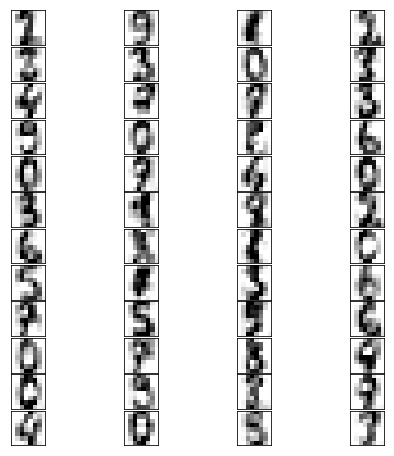

In [11]:
kde(16)

### KDE for 28 features

bandwidth selcted :  2.9763514416313175

48 new data points generated : 



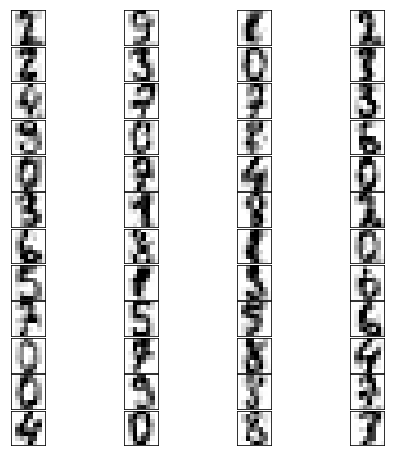

In [12]:
kde(28)

### KDE for 40 features

best bandwidth: 2.3357214690901213

48 new data points generated : 



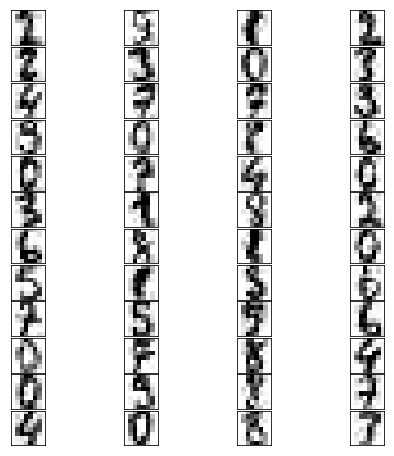

In [72]:
kde(40)

## Part 2 : GMM Based Density estimation

### GMM Based Density estimation

In [74]:
def gmm(n):
    pca = PCA(n, whiten=True)
    data = pca.fit_transform(digits.data)
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 20)
    covariance_options = ['spherical', 'tied', 'diag', 'full']
    for cv_type in covariance_options:
        for n_components in n_components_range:
            gmm = GMM(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(data)
            bic.append(gmm.bic(data))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    print("Number of components selected using bic score: ",best_gmm.n_components)
    print("Covariance type used: ",best_gmm.covariance_type)
    print("Plotting the bic scores and final components: ")
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    clf = best_gmm
    bars = []
    plt.figure(figsize=(20, 20))
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(covariance_options, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], covariance_options)
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(data)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                               color_iter)):
        v, w = np.linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(data[Y_ == i, 0], data[Y_ == i, 1], .8, color=color)
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi 
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, '+ str(best_gmm.n_components) +' components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    best_gmm.fit(data)
    print(best_gmm.converged_)
    data_new = best_gmm.sample(48)
    data_new_2 = data_new[0]
    digits_new = pca.inverse_transform(data_new_2)
    digits_new.shape
    print("Generating new 48 samples: ")
    plot_digits(digits_new)

### GMM for 16 features

Number of components selected using bic score:  9
Covariance type used:  full
Plotting the bic scores and final components: 


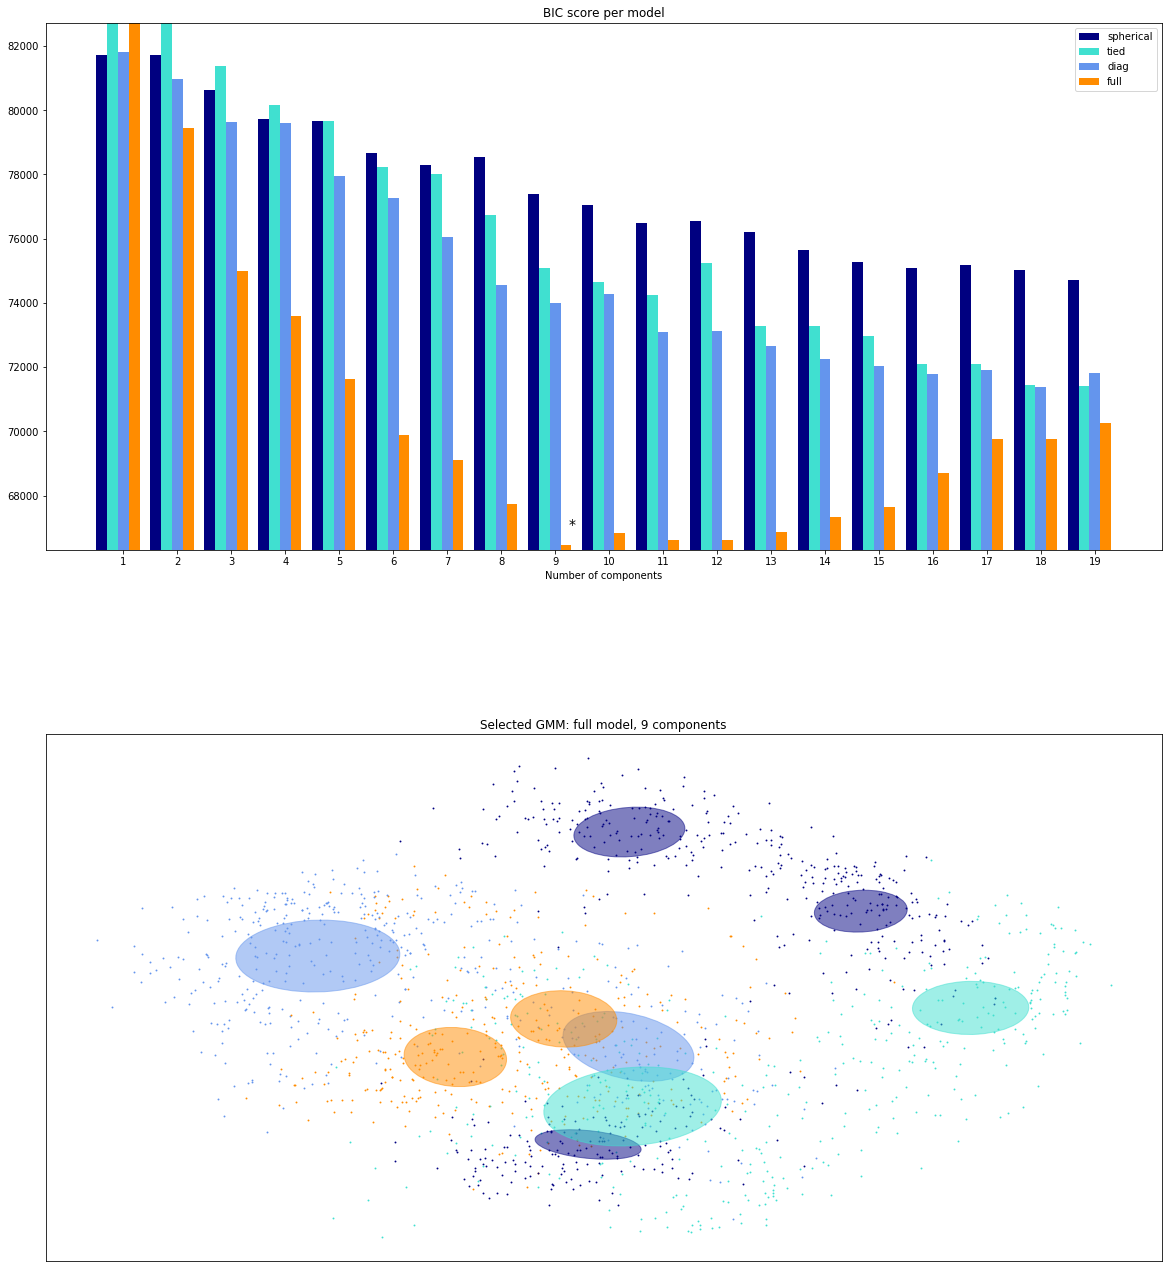

True
Generating new 48 samples: 


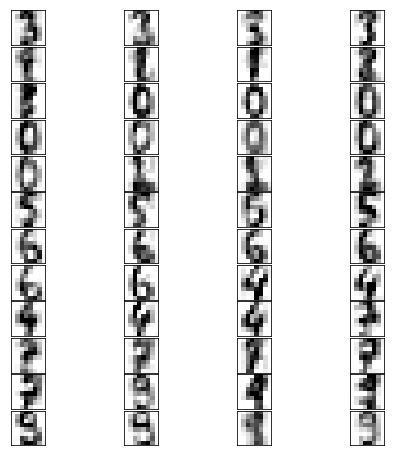

In [75]:
gmm(16)

### GMM for 28 features

Number of components selected using bic score:  8
Covariance type used:  full
Plotting the bic scores and final components: 


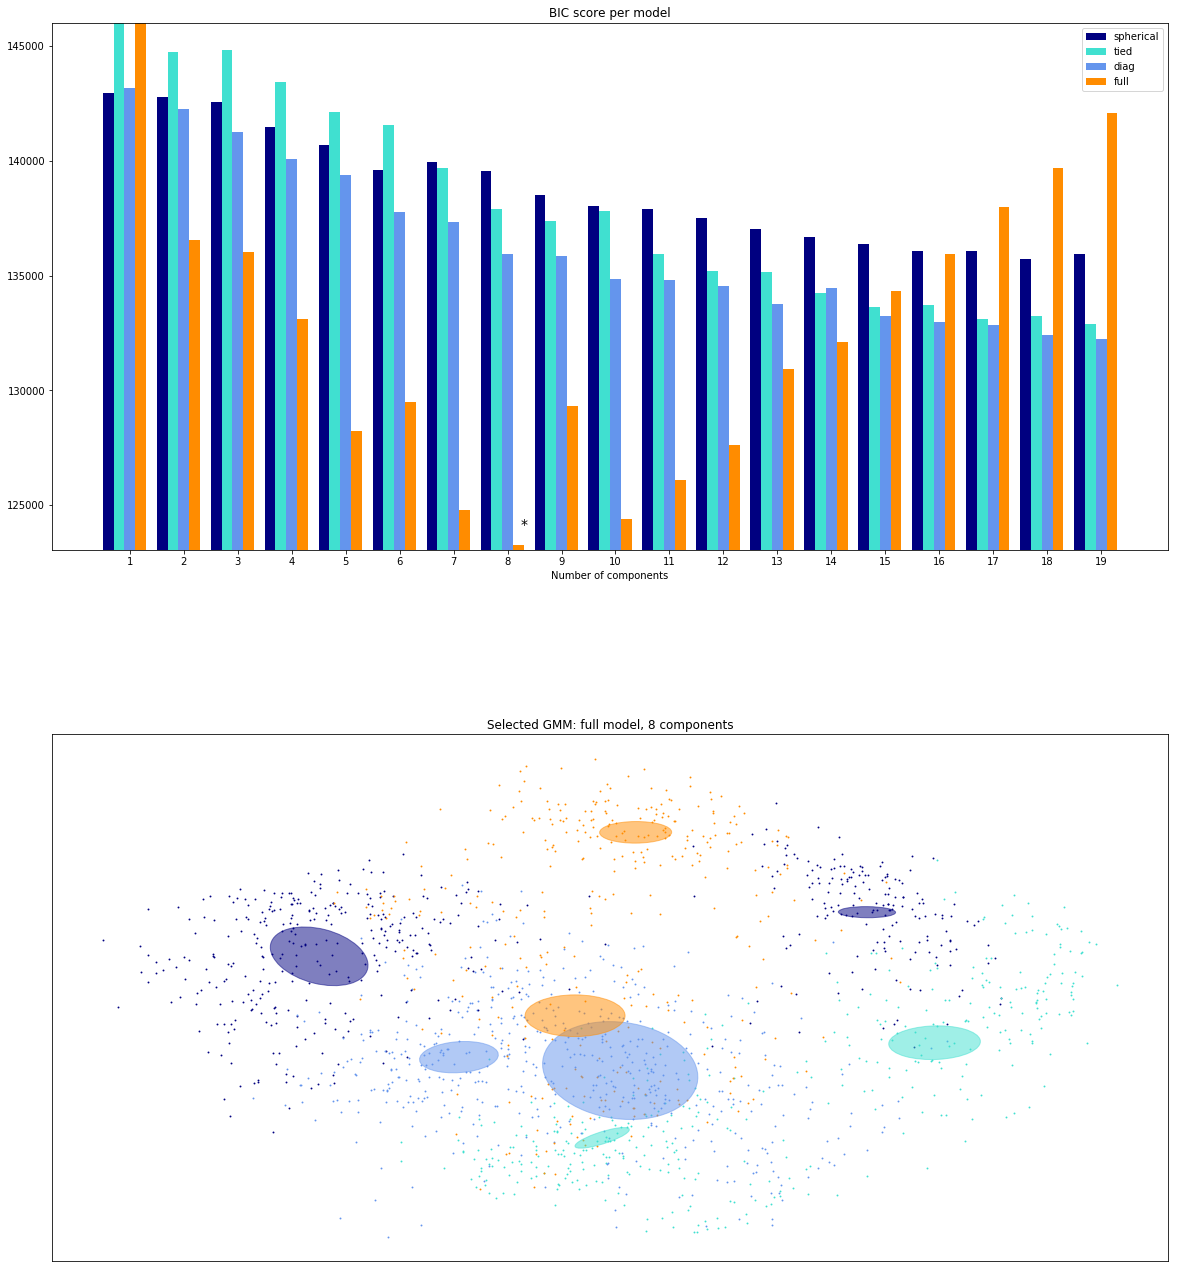

True
Generating new 48 samples: 


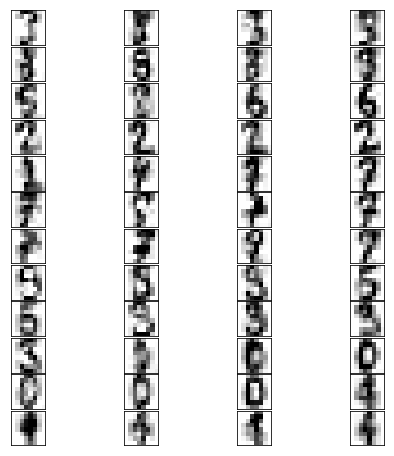

In [80]:
gmm(28)

### GMM for 40 features

Number of components selected using bic score:  5
Covariance type used:  full
Plotting the bic scores and final components: 


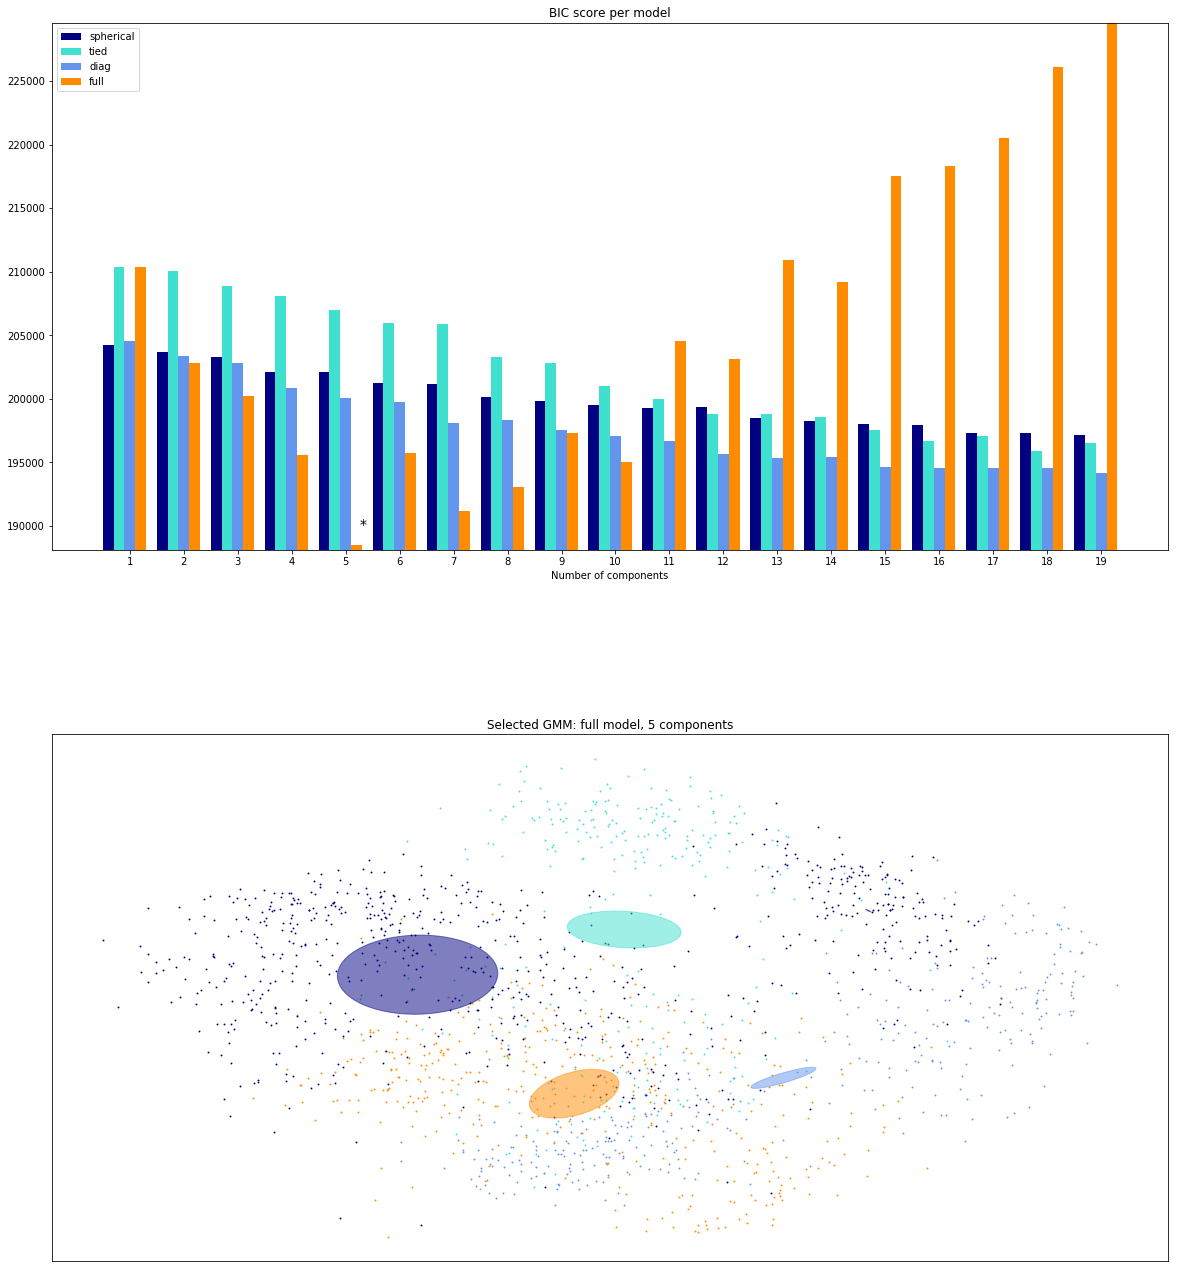

True
Generating new 48 samples: 


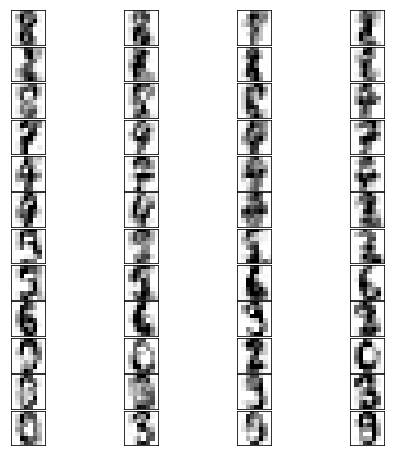

In [84]:
gmm(40)